<a href="https://colab.research.google.com/github/MahinaM00N/Tareas-Metodos-Numericos-y-Probabilidades/blob/main/Tarea_8_2_M%C3%A9todos_Num%C3%A9ricos_y_Probabilidades.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tarea 8.2
Mahina Montoya Zavala |Métodos numéricos y probabilidades

Escriba un código similar a la interpolación lineal de la clase, pero que realice una interpolación cuadrática. Es decir, este código interpola usando una parábola para cada trío de puntos. Grafique sus resultados para el mismo ejemplo usado en la interpolación lineal.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

Modificamos el código visto en la clase 15 para una interpolación lineal, para encontrar e interpolar los puntos, pero esta vez agregamos un tercer polinomio de legendre  

In [10]:
def find_ind(x, puntos):
    for i in range(len(puntos)):
        if x < puntos[i,0] and i != 0:
            return i-1

def cub_interp(x,puntos):
    
    if x >= puntos[len(puntos)-1,0]:
        return puntos[len(puntos)-1,1]
    elif x <= puntos[0,0]:
        return puntos[0,1]
    
    i = find_ind(x, puntos)
    
    L0=puntos[i-1][1]*(x-puntos[i][0])/(puntos[i-1][0] - puntos[i][0])    #agregamos este polinomio de Legendre distinto a los vistos en clase   
    L1=puntos[i][1]*((x-puntos[i+1][0])/(puntos[i][0]-puntos[i+1][0]))*(x-puntos[i-1][0])/(puntos[i][0]-puntos[i-1][0])
    L2=puntos[i+1][1]*((x-puntos[i-1][0])/(puntos[i+1][0]-puntos[i-1][0]))*(x-puntos[i][0])/(puntos[i+1][0]-puntos[i][0])
    
    return L0 + L1 + L2

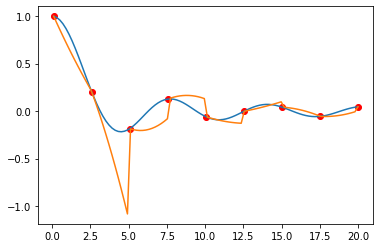

In [11]:
mini = 0.1
maxi = 20
order = 9

xp = np.linspace(mini, maxi, order)
puntos = np.array([[xi, np.sin(xi)/xi] for xi in xp])

x = np.linspace(mini, maxi, 100)
exact = np.sin(x)/x
lin = [cub_interp(xi, puntos) for xi in x]

plt.scatter(puntos[:,0], puntos[:,1], color='red')
plt.plot(x, exact)
plt.plot(x, lin)